# Example: Plot on NorthPolarStereo and set the latitude limit

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
# or
# from imports import (plt, np, xr)
path = '~/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/abs550aer_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_185001-185912.nc'
ds = xr.open_dataset(path)


In [2]:
import cartopy.crs as ccrs
import cartopy as cy
def sp_map(*nrs, projection = ccrs.PlateCarree(), **kwargs):
    return plt.subplots(*nrs, subplot_kw={'projection':projection}, **kwargs)

def add_map_features(ax):
    ax.coastlines()
    gl = ax.gridlines()
    ax.add_feature(cy.feature.BORDERS);
    gl = ax.gridlines()#draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False

In [3]:
import matplotlib.path as mpath

def polarCentral_set_latlim(lat_lims, ax):
    ax.set_extent([-180, 180, lat_lims[0], lat_lims[1]], ccrs.PlateCarree())
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)

### Now plot!
Example with latitude from 70-90:

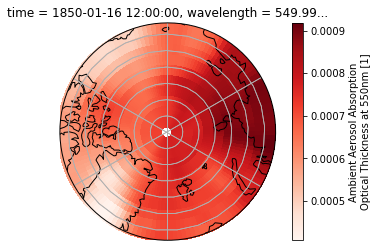

In [4]:
# Make the axis with NorthPolarStereo() projection:
fig, ax = sp_map(1, projection=ccrs.NorthPolarStereo() )
lat_lims = [70,90]
ds['abs550aer'].isel(time=0).where(ds['lat']>lat_lims[0]).plot(ax=ax, cmap=plt.get_cmap('Reds'),transform=ccrs.PlateCarree())
polarCentral_set_latlim(lat_lims, ax)
add_map_features(ax)
plt.show()
